# Human labeled sentiment compared to VADER and Text Blob sentiment

In [234]:
# Import the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

%matplotlib inline

In [298]:
# Function Definitions

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return str(percentage) + '%'

def get_vader_sentiment(analyzer, tweet):
    tweet = tweet.replace('#','')  # we want things like #fail to be included in text
    vader_scores = analyzer.polarity_scores(tweet)
    compound_score = vader_scores['compound']
    vader_sentiment = None
    # using thresholds from VADER developers/researchers are
    if (compound_score >= 0.05):
        vader_sentiment = 'positive'
    elif (compound_score < 0.05 and compound_score > -0.05):
        vader_sentiment = 'neutral'
    elif (compound_score <= -0.05):
        vader_sentiment = 'negative'
    return vader_sentiment

def get_text_blob_sentiment(tweet):
    polarity = TextBlob(tweet).sentiment.polarity
    # The polarity score is a float within the range [-1.0, 1.0]. 
    textblob_sentiment = None
    if (polarity > 0):
        textblob_sentiment = 'positive'
    elif (polarity == 0):
        textblob_sentiment = 'neutral'
    elif (polarity < 0):
        textblob_sentiment = 'negative'
    return textblob_sentiment    



In [274]:
tweets = pd.read_csv('../data/prepped_sxsw_tweets.csv')
print(tweets.shape)
tweets.head(3)

(8720, 5)


,id,tweet_text,labeled_brand_or_product,detected_emotion,human_sentiment
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive


Cool....so let's get sentiment from VADER and from Text Blob. 

__VADER__ : Use the compound score to label the tweet as Positive/Neutral/Negative. 

The thresholds from VADER developers/researchers are:
* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

__Text Blob__ : Use the sentiment polarity score to label the tweet as Positive/Neutral/Negative. 

The thresholds from Text Blob developers/researchers are:
*  The polarity score is a float within the range -1.0, 1.0


In [275]:
# Get the VADER sentiments
analyzer = SentimentIntensityAnalyzer()
tweets['vader_sentiment'] = tweets.apply(lambda row: get_vader_sentiment(analyzer, row['tweet_text']), axis=1)
tweets.head(3)

,id,tweet_text,labeled_brand_or_product,detected_emotion,human_sentiment,vader_sentiment
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative,negative
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive,positive
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive,neutral


In [276]:
# Get the Text Blob sentiments
tweets['text_blob_sentiment'] = tweets.apply(lambda row: get_text_blob_sentiment(row['tweet_text']), axis=1)
tweets.head(3)

,id,tweet_text,labeled_brand_or_product,detected_emotion,human_sentiment,vader_sentiment,text_blob_sentiment
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative,negative,negative
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive,positive,positive
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive,neutral,negative


Cool! Let's compare the Human-labeled Sentiment to what the two sentiment tools decided.

In [258]:
by_human = tweets.groupby(['human_sentiment'])['tweet_text'].count()
by_vader = tweets.groupby(['vader_sentiment'])['tweet_text'].count()
by_textblob =  tweets.groupby(['text_blob_sentiment'])['tweet_text'].count()

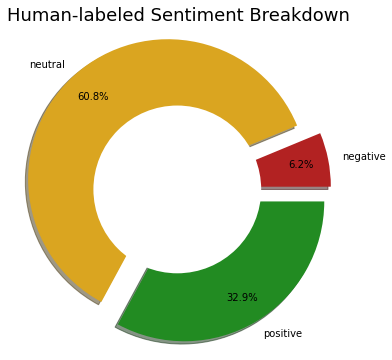

In [254]:

fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors =  ['firebrick','goldenrod', 'forestgreen']
plt.pie(by_human, labels=by_human.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('Human-labeled Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  


plt.show()

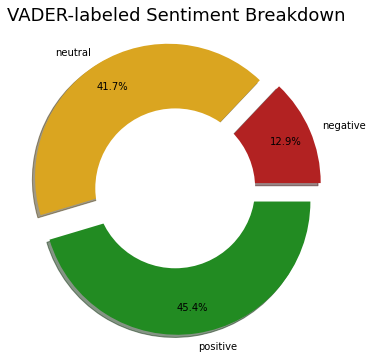

In [255]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors = ['firebrick','goldenrod', 'forestgreen']
plt.pie(by_vader, labels=by_vader.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('VADER-labeled Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.show()

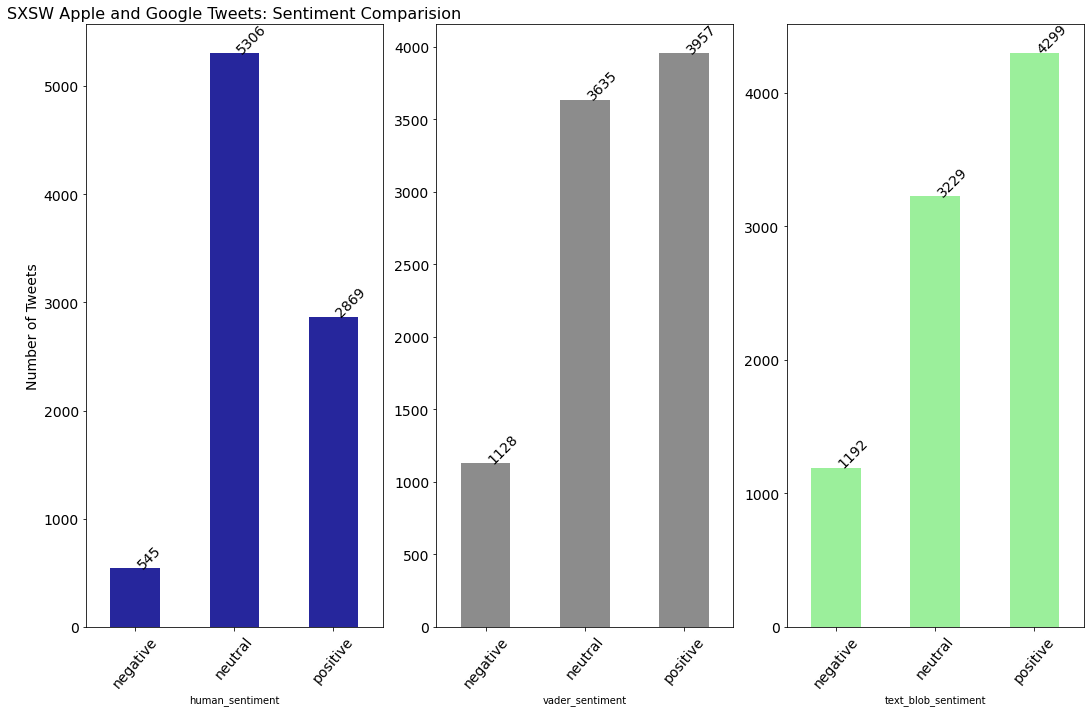

In [263]:
plt.subplot(1, 3, 1)
h_labels = by_human.values
plt.title('SXSW Apple and Google Tweets: Sentiment Comparision', size='16')
by_human.plot.bar(fontsize=14, rot=50, alpha=0.85, figsize=(15,10), color='darkblue')
plt.ylabel('Number of Tweets',size=14)
for i in range(3):
    plt.text(x=i, y=h_labels[i], s=h_labels[i], size=14, rotation=45, color='black')

plt.subplot(1, 3, 2)
v_labels = by_vader.values
by_vader.plot.bar(fontsize=14, rot=50, alpha=0.9, figsize=(15,10), color='gray')
for i in range(3):
    plt.text(x=i, y=v_labels[i], s=v_labels[i], size=14, rotation=45, color='black')

plt.subplot(1, 3, 3)
tb_labels = by_textblob.values
by_textblob.plot.bar(fontsize=14, rot=50, alpha=0.9, figsize=(15,10), color='lightgreen')
for i in range(3):
    plt.text(x=i, y=tb_labels[i], s=tb_labels[i], size=14, rotation=45, color='black')

plt.yticks(size=14)
plt.tight_layout()
plt.show()

WOW, there is a difference!


In [265]:
sentiment_diff = tweets[tweets['human_sentiment'] != tweets['vader_sentiment']]
print(sentiment_diff.shape, tweets.shape)

sentiment_diff2 = tweets[tweets['human_sentiment'] != tweets['text_blob_sentiment']]
print(sentiment_diff2.shape, tweets.shape)


(4104, 7) (8720, 7)
(4490, 7) (8720, 7)


47% (4104 of 8720 tweets) had a difference between the Human and VADER sentiments.
51% (4490 of 8720 tweets) had a differnece between the Human and Text Blob sentiments.


The dataset provider mentions that the human-labeled sentiment "directed at" a brand or product. This may account for the difference. 

Let's try this with another, similiar dataset.

In [226]:
apple_tweets = pd.read_csv('../data/prepped_apple_tweets.csv')
print(apple_tweets.shape)
apple_tweets.head(2)

(1630, 4)


,id,text,sentiment,human_sentiment
0,0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,negative
1,1,What Happened To Apple Inc? http://t.co/FJEX...,0,neutral


In [227]:
# Get the VADER sentiments
analyzer = SentimentIntensityAnalyzer()
apple_tweets['vader_sentiment'] = apple_tweets.apply(lambda row: get_vader_sentiment(analyzer, row['text']), axis=1)
apple_tweets.head(2)

,id,text,sentiment,human_sentiment,vader_sentiment
0,0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,negative,positive
1,1,What Happened To Apple Inc? http://t.co/FJEX...,0,neutral,neutral


In [268]:
# Get the Text Blob sentiments
apple_tweets['text_blob_sentiment'] = apple_tweets.apply(lambda row: get_text_blob_sentiment(row['text']), axis=1)
apple_tweets.head(3)

,id,text,sentiment,human_sentiment,vader_sentiment,text_blob_sentiment
0,0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,negative,positive,positive
1,1,What Happened To Apple Inc? http://t.co/FJEX...,0,neutral,neutral,neutral
2,2,Thank u @apple I can now compile all of the pi...,1,positive,positive,neutral


In [270]:
apple_by_human = apple_tweets.groupby(['human_sentiment'])['text'].count()
apple_by_vader = apple_tweets.groupby(['vader_sentiment'])['text'].count()
apple_by_textblob = apple_tweets.groupby(['text_blob_sentiment'])['text'].count()

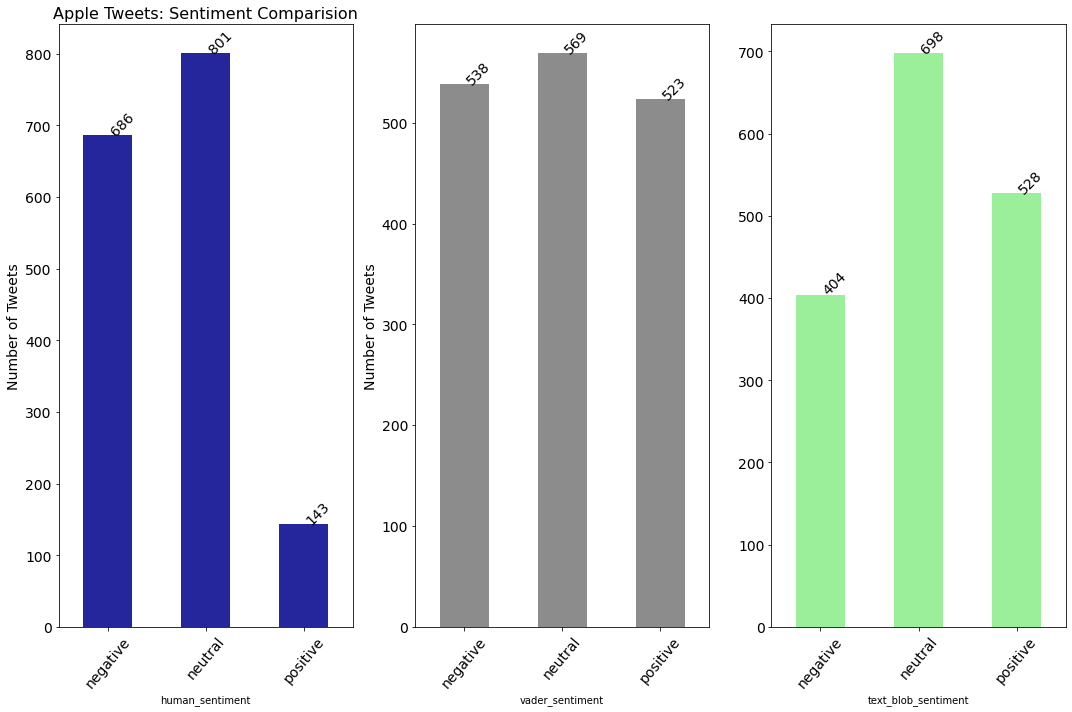

In [272]:
plt.subplot(1, 3, 1)
plt.title('Apple Tweets: Sentiment Comparision', size='16')
apple_by_human.plot.bar(fontsize=14, rot=50, alpha=0.85, figsize=(15,10), color='darkblue')
plt.ylabel('Number of Tweets',size=14)
h_labels = apple_by_human.values
for i in range(3):
    plt.text(x=i, y=h_labels[i], s=h_labels[i], size=14, rotation=45, color='black')
plt.ylabel('Number of Tweets',size=14)

plt.subplot(1, 3, 2)
apple_by_vader.plot.bar(fontsize=14, rot=50, alpha=0.9, figsize=(15,10), color='gray')
v_labels = apple_by_vader.values
for i in range(3):
    plt.text(x=i, y=v_labels[i], s=v_labels[i], size=14, rotation=45, color='black')
plt.ylabel('Number of Tweets',size=14)

plt.subplot(1, 3, 3)
tb_labels = apple_by_textblob.values
apple_by_textblob.plot.bar(fontsize=14, rot=50, alpha=0.9, figsize=(15,10), color='lightgreen')
for i in range(3):
    plt.text(x=i, y=tb_labels[i], s=tb_labels[i], size=14, rotation=45, color='black')


plt.yticks(size=14)
plt.tight_layout()
plt.show()

## Observations
### Google and Apple Tweets from SXSW
* Negatives and Positives increased, Neutrals decreased
* VADER & Text Blob labeled some Human-Neutral Tweets as Negatives and Positive 
### Tweets that mention Apple
* Positives increased, Negatives and Neutrals decreased
* VADER & Text Blob labeled some Human-Neutral and Human-Negative and tweets as Positive


While these datasets may not be ideally similar, they are somewhat similar (all from Twitter, all either related to Apple or Apple and Google).  



In [283]:
# Apple and Google products - Neutrals decreased while  Neg and Pos increased
neut_pos_v_diff = tweets[(tweets['human_sentiment'] == 'neutral') & (tweets['vader_sentiment'] == 'positive')]
print(neut_pos_v_diff.shape)

neut_neg_v_diff = tweets[(tweets['human_sentiment'] == 'neutral') & (tweets['vader_sentiment'] == 'negative')]
print(neut_neg_v_diff.shape)

neut_pos_tb_diff = tweets[(tweets['human_sentiment'] == 'neutral') & (tweets['text_blob_sentiment'] == 'positive')]
print(neut_pos_tb_diff.shape)

neut_neg_tb_diff = tweets[(tweets['human_sentiment'] == 'neutral') & (tweets['text_blob_sentiment'] == 'negative')]
print(neut_neg_tb_diff.shape)

(2008, 7)
(664, 7)
(2301, 7)
(734, 7)


In [285]:
# Apple tweets
neut_pos_v_apptweets_diff = apple_tweets[(apple_tweets['human_sentiment'] == 'neutral') & (apple_tweets['vader_sentiment'] == 'positive')]
print(neut_pos_v_apptweets_diff.shape)

neg_pos_v_apptweets_diff = apple_tweets[(apple_tweets['human_sentiment'] == 'negative') & (apple_tweets['vader_sentiment'] == 'positive')]
print(neg_pos_v_apptweets_diff.shape)

neut_pos_tb_apptweets_diff = apple_tweets[(apple_tweets['human_sentiment'] == 'neutral') & (apple_tweets['text_blob_sentiment'] == 'positive')]
print(neut_pos_tb_apptweets_diff.shape)

neg_pos_tb_apptweets_diff = apple_tweets[(apple_tweets['human_sentiment'] == 'negative') & (apple_tweets['text_blob_sentiment'] == 'positive')]
print(neg_pos_tb_apptweets_diff.shape)


(267, 6)
(135, 6)
(263, 6)
(160, 6)


How might we use the Sentiment tools to get a "second opinion" on Human-labled Neutrals?

Human opinions on Neutrals might vary between human to human and even as a single human goes about labeling neutral text. Also, we might just want to create a binary classifier.  These are both compelling scenarios for using the tools to get a second opinion. 

How might we do that? Get the sentiment from both tools and if both agree, use that sentiment in place of the Human Neutral label.  

Look below to see how many Neutral tweets could be re-labeled from our two datasets.


In [299]:
# Apple Google product SXSW tweets
second_opinion_tweets = tweets[(tweets['human_sentiment'] == 'neutral') & (tweets['vader_sentiment'] != 'neutral') & (tweets['text_blob_sentiment'] != 'neutral') & (tweets['vader_sentiment'] == tweets['text_blob_sentiment'])]

get_pretty_percent(second_opinion_tweets.shape[0],tweets[(tweets['human_sentiment'] == 'neutral')].shape[0])
 

'0.286%'

In [300]:
# Apple tweets
second_opinion_apple_tweets = apple_tweets[(apple_tweets['human_sentiment'] == 'neutral') & (apple_tweets['vader_sentiment'] != 'neutral') & (apple_tweets['text_blob_sentiment'] != 'neutral') & (apple_tweets['vader_sentiment'] == apple_tweets['text_blob_sentiment'])]

get_pretty_percent(second_opinion_apple_tweets.shape[0], apple_tweets[(apple_tweets['human_sentiment'] == 'neutral')].shape[0])

'0.21%'

## Conclusions
Human-labels are still the gold-standard. But sentiment tools like VADER and Text Blob are certainly useful. Here are two specific cases.

### CASE 1 - You need sentiment but don't have resources to have humans label your Test/Train data.
I would certainly use VADER or Text Blob if I you didn't have any sentiment labels at all. I would probably use them both and use the sentiment where both tools agreed and then hand label the cases where the two tools differed.


### CASE 2 - You want a second opinion on Neutral text. 
Human opinions on Neutral text might vary between human to human and even as a single human goes about labeling neutral texts. Also, you might just want to create a binary classifier.  Getting a "second opinion" would be helpful to both "standardize" on Neutral sentiment OR if you wanted to perform binary classification on Positive or Negative and didn't want to just drop the Neutral texts. Retaining text might be especially desirable when Neutral is an over-represented class (like in the SXSW and Apple Tweets datasets). 


In [232]:
# Save VADER sentiment
tweets.to_csv('../data/sxsw_tweets_with_vader.csv', index_label='id')
apple_tweets.to_csv('../data/apple_tweets_with_vader.csv', index_label='id')